In [1]:
from collections import namedtuple
import numpy as np

In [8]:
Point = namedtuple ('Point',['x','y'])

In [9]:
def row_parser (row):
    splitted = row.strip().split(',')
    p = Point ( float ( splitted[0] ), float ( splitted[1] ) )
    return p

def reader ():
    points = []
    with open ('ex1data1.txt', 'r') as f:
        for row in f:
            point = row_parser (row)
            points.append (point)
    point_x = np.array ( [point.x for point in points] )
    point_y = np.array ( [point.y for point in points] )
    return point_x, point_y

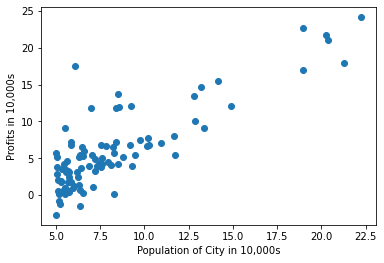

In [10]:
import matplotlib.pyplot as plt
point_x, point_y = reader ()
plt.scatter (point_x, point_y)
plt.xlabel ('Population of City in 10,000s')
plt.ylabel ('Profits in 10,000s')
plt.show()

In [11]:
def cost_function (X, theta, y):
    m = len (X[0])
    cost = 0
    for i in range (m):
        h_theta = theta[0] + theta[1] * X [1][i]
        cost += 1 / ( 2 * m ) * ( h_theta - y[i] ) ** 2
    return cost

In [12]:
def gradient_descent (X, theta, y, alpha=0.01, iterations=1500):
    m = len ( X [0] )
    costs = []
    for iteration in range (iterations):
        sum_x_0 = 0
        sum_x_1 = 0
        #Calculations to update theta_0
        for i in range (m):
            h_theta = theta[0] * X [0][i] + theta[1] * X [1][i]
            sum_x_0 +=  1 / m * ( h_theta - y[i] ) * X[0][i]
        #Calculations to update theta_1
        for i in range (m):
            h_theta = theta[0] * X [0][i] + theta[1] * X [1][i]
            sum_x_1 +=  1 / m * ( h_theta - y[i] ) * X[1][i]
        #update theta_0 and theta_1
        theta [0] = theta [0] - alpha * sum_x_0
        theta [1] = theta [1] - alpha * sum_x_1
        cost = cost_function (X, theta, y)
        costs.append (cost)
    return theta, costs

In [15]:
ones = np.ones (len(point_x))
X = [ ones, point_x ]
theta = [0,0]
iterations = 1500
alpha = 0.01
theta, costs = gradient_descent ( X, theta, point_y, alpha )

Text(0, 0.5, 'cost')

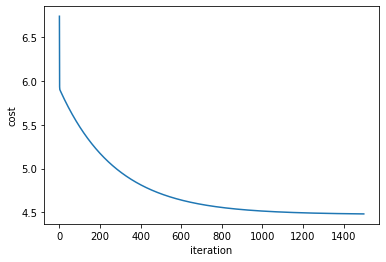

In [16]:
plt.plot ( range(0,iterations) ,costs)
plt.xlabel ('iteration')
plt.ylabel ('cost')

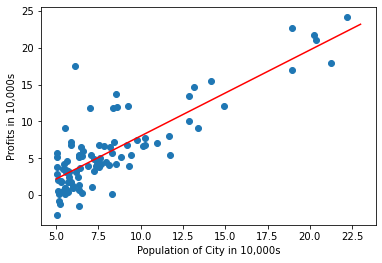

In [20]:
xx = [item/iterations for item in range (5*iterations,23*iterations)]
yy = np.array (theta[0]) + np.array(theta[1]) * np.array(xx)
plt.plot (xx,yy,color='red')
plt.scatter (point_x, point_y)
plt.xlabel ('Population of City in 10,000s')
plt.ylabel ('Profits in 10,000s', color='black')
plt.show()